In [1]:
import sys
sys.path.append('..')
from src.kitti import *
import numpy as np
import cv2
%matplotlib inline

Read frame transformations from KITTI sequence 00 into a list of frames (frame).

In [2]:
IMAGE_SIZE = 400

def load(file):
    keyframeids, frameids, poses = load_keyframes(file)
    return keyframeids, frameids, poses.reshape(poses.shape[0], 4, 4)

def load_csv(file):
    poses = np.genfromtxt(file, delimiter= " ")
    poses = np.hstack([poses, np.repeat(np.array([[0,0,0,1.0]]), len(poses), axis=0) ])
    return poses.reshape(poses.shape[0], 4, 4)

def transform(poses):
    points = np.repeat(np.array([[0,0,0,1.0]]), len(poses), axis=0) 
    for i in range(1, len(poses)):
        points[:i] = np.dot(points[:i], poses[i].T)
    return points
        
def transform2(poses):
    points = poses[:,:,3]
    return points
   
def transform3(poses):
    points = np.repeat(np.array([[0,0,0,1.0]]), len(poses), axis=0) 
    for i in range(1, len(poses)):
        points[i] = np.dot(points[i], poses[i].T)
    return points
    
def plot_trajectory(points):
    # remove y coordinate (we only use x and z to plot a view from above)
    points = points[:, [0,2,3]]
    # compute min and max
    pmin = points.min(axis=0)
    pmax = points.max(axis=0)
    maxxy = max(pmax[0] - pmin[0], pmax[1] - pmin[1])

    t = np.eye(3, dtype=np.float64)
    t[0,0] = IMAGE_SIZE / maxxy
    t[1,1] = -IMAGE_SIZE / maxxy
    t[0,2] = -pmin[0] * IMAGE_SIZE / maxxy
    t[1,2] = IMAGE_SIZE / maxxy + pmin[1] / maxxy + 100

    return np.dot(points, t.T)
    

def plot_trajectory2(points):
    # remove y coordinate (we only use x and z to plot a view from above)
    points = points[:, [0,2,3]]
    # compute min and max
    pmin = points.min(axis=0)
    pmax = points.max(axis=0)
    maxxy = max(pmax[0] - pmin[0], pmax[1] - pmin[1]) * 1.01

    t = np.eye(3, dtype=np.float64)
    t[0,0] = IMAGE_SIZE / maxxy
    t[1,1] = -IMAGE_SIZE / maxxy
    t[0,2] = -pmin[0] * IMAGE_SIZE / maxxy
    t[1,2] = IMAGE_SIZE / maxxy + pmin[1] / maxxy + 100
    return np.dot(points, t.T)
    
def plot_trajectory3(points):
    coords = []
    minx = min([p[0] for p in points])
    maxx = max([p[0] for p in points])
    miny = min([p[2] for p in points])
    maxy = max([p[2] for p in points])
    maxxy = max(maxx - minx, maxy - miny)* 1.01

    for p in points:
        #print(p)
        x = IMAGE_SIZE * (p[0] - minx) / (maxxy)
        z = IMAGE_SIZE - IMAGE_SIZE * (p[2] - miny) / (maxxy)
        coords.append([x, z])
    return coords

def new_image():
    img = np.zeros((IMAGE_SIZE, IMAGE_SIZE, 3), np.uint8)
    img[:] = 255 #or img.fill(255)
    return img

def draw(coords, img, color = (0,0,0)):
    # Draw a black line with thickness of 2 px
    for i in range(1,len(coords)):
        cv2.line(img, (int(coords[i - 1][0]), int(coords[i - 1][1])), (int(coords[i][0]), int(coords[i][1])), color, 2)
    return img

Compute the frame positions by mutiplying every point by a sequence of their transformations
vectorized to improve speed

In [3]:
sequence = 2

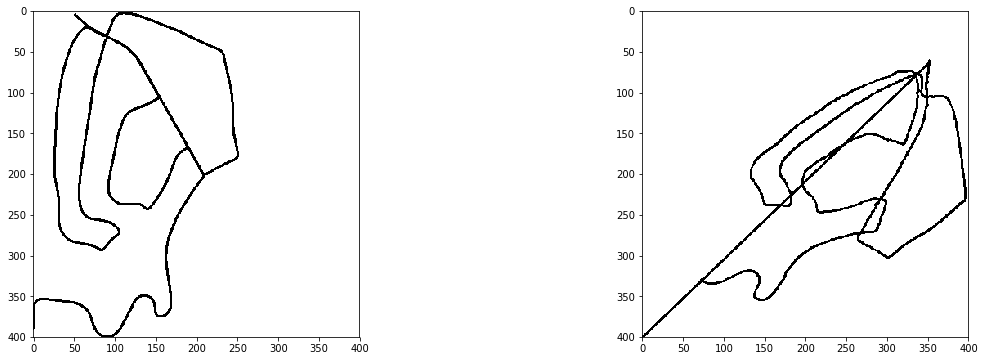

In [5]:
folder = '/data/urbinn/datasets/urb_trajectory_output'
#folder = '/home/jeroen/notebooks/urb/resultsba'
keyframeids, frameids, poses = load(folder + '/keyframes_%02d_all_17_1.6_1.6.npy'%(sequence))

posesold = poses
points = transform(poses[:])
coords = plot_trajectory3(points)
p = draw(coords, new_image())

gt = load_csv('/data/urbinn/datasets/kitti/poses/%02d.txt'%(sequence))
pointsgt = transform2(gt)
coordsgt = plot_trajectory3(pointsgt)
show2(draw(coordsgt, new_image()), p)

In [ ]:
folder = '/data/urbinn/datasets/urb_trajectory_rotationfixed'
folder = '/home/jeroen/notebooks/urb/resultsba'
keyframeids, frameids, poses = load(folder + '/keyframes_%02d_all_17_1.6_1.6.npy'%(sequence))

posesnew = poses
points = transform3(poses[:])
coords = plot_trajectory(points)
p = draw(coords, new_image())

gt = load_csv('/data/urbinn/datasets/kitti/poses/%02d.txt'%(sequence))
pointsgt = transform2(gt)
coordsgt = plot_trajectory3(pointsgt)
show2(draw(coordsgt, new_image()), p)

In [70]:
#comparez = np.hstack([posesnew[:,2,3].reshape((-1,1)), posesold[:,2,3].reshape((-1,1))])
znew = posesnew[:,[0,2],3].reshape((-1,2))
zold = posesold[:,[0,2],3].reshape((-1,2))
znew2 = np.array((len(znew), 2))
#znew2[0] = znew[0]
posesnew[:10]

array([[[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00],
        [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
           0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
           0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           1.00000000e+00]],

       [[  9.83956112e-01,  -9.96469778e-03,   1.78132182e-01,
           6.17441894e-02],
        [  8.56591604e-03,   9.99926159e-01,   8.61987158e-03,
           3.12014517e-02],
        [ -1.78204923e-01,  -6.95571001e-03,   9.83968812e-01,
          -1.62573372e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           1.00000000e+00]],

       [[  9.03171614e-01,  -2.84669124e-02,   4.28334765e-01,
          -3.18327287e-01],
        [  2.47271322e-02,   9.99592047e-01,   1.42936224e-02,
           7.39654289e-02],
        [ -4.28566920e-01,  -2.31810362e-03,   9.03507068e-01,
          -3.27083244e+

In [56]:
p = posesold.copy()
for i in range(1, len(p)):
    p[i] = np.dot( p[i-1], p[i] )
pterug = p.copy()
for i in range(len(p)-1, 0, -1):
    pterug[i] = np.dot( np.linalg.pinv(pterug[i-1]), pterug[i] )

print(posesold[:,2,3])
pterug[:,2,3]

[  0.          -2.84499075  -8.83428824  -7.72307347 -10.11382301
 -13.63033392  -7.11867111  -1.48455508 -10.94200983  -9.47702003
  -7.79740409  -8.97923722  -8.31843629  -6.67390092  -8.66951972
  -4.13459171  -6.43087636  -4.15862223 -12.02870916  -8.59069278
  -5.17345818  -2.82189697  -7.74412606  -2.86136314  -4.34619961
  -5.68947208 -10.17639467 -10.57885523 -10.8362151  -10.35870421
  -5.6464397   -7.91372382  -8.08793396 -10.43989473  -4.68519814
  -8.41507618  -6.25061309  -4.64089991  -4.60010689  -2.78249127
  -1.44626566  -1.81016212  -3.28613071  -5.1917992   -4.65930052
  -3.2445208   -2.28349907  -0.94794767  -3.40463506  -5.05525465
  -6.81110838 -10.11266591  -3.87010946  -6.98530698  -3.37581884
  -4.93240884  -7.12510415  -9.45254477  -3.28184716  -4.84531785
  -5.16460898  -5.04613155  -3.72914635]


array([  0.        ,  -2.84499075,  -8.83428824,  -7.72307347,
       -10.11382301, -13.63033392,  -7.11867111,  -1.48455508,
       -10.94200983,  -9.47702003,  -7.79740409,  -8.97923722,
        -8.31843629,  -6.67390092,  -8.66951972,  -4.13459171,
        -6.43087636,  -4.15862223, -12.02870916,  -8.59069278,
        -5.17345818,  -2.82189697,  -7.74412606,  -2.86136314,
        -4.34619961,  -5.68947208, -10.17639467, -10.57885523,
       -10.8362151 , -10.35870421,  -5.6464397 ,  -7.91372382,
        -8.08793396, -10.43989473,  -4.68519814,  -8.41507618,
        -6.25061309,  -4.64089991,  -4.60010689,  -2.78249127,
        -1.44626566,  -1.81016212,  -3.28613071,  -5.1917992 ,
        -4.65930052,  -3.2445208 ,  -2.28349907,  -0.94794767,
        -3.40463506,  -5.05525465,  -6.81110838, -10.11266591,
        -3.87010946,  -6.98530698,  -3.37581884,  -4.93240884,
        -7.12510415,  -9.45254477,  -3.28184716,  -4.84531785,
        -5.16460898,  -5.04613155,  -3.72914635])

Show the affine world coodinates for the first 3 poses

In [ ]:
points[:3]

show the converted x,y coordinates to plot the trajectory

In [ ]:
coords[:3]